# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_csv("../data/full_dataset/jul24_to_jul_2025.csv")
df.head()

,Title,Job_ID,source,Skills,month,year
0,auxiliar de mostrador,job_624fd0a8f34770fb,indeed,experiencia en atencion al cliente,7,2024
1,auxiliar de mostrador,job_624fd0a8f34770fb,indeed,gusto por el servicio y atencion al cliente,7,2024
2,auxiliar de mostrador,job_624fd0a8f34770fb,indeed,preparatoria terminada,7,2024
3,auxiliar de mostrador,job_624fd0a8f34770fb,indeed,mayor de anos,7,2024
4,auxiliar de mostrador,job_624fd0a8f34770fb,indeed,experiencia en empleos presenciales,7,2024


In [3]:
df.count()

Title     204373
Job_ID    204373
source    204373
Skills    204373
month     204373
year      204373
dtype: int64

In [5]:
df_grouped_month_year = df.groupby(['year', 'month'])["Skills"].count().reset_index(name='counts')
df_grouped_month_year

,year,month,counts
0,2024,7,16885
1,2024,8,15666
2,2024,9,19512
3,2024,10,13166
4,2024,11,15739
5,2024,12,16673
6,2025,1,19869
7,2025,3,27289
8,2025,4,23161
9,2025,5,24205


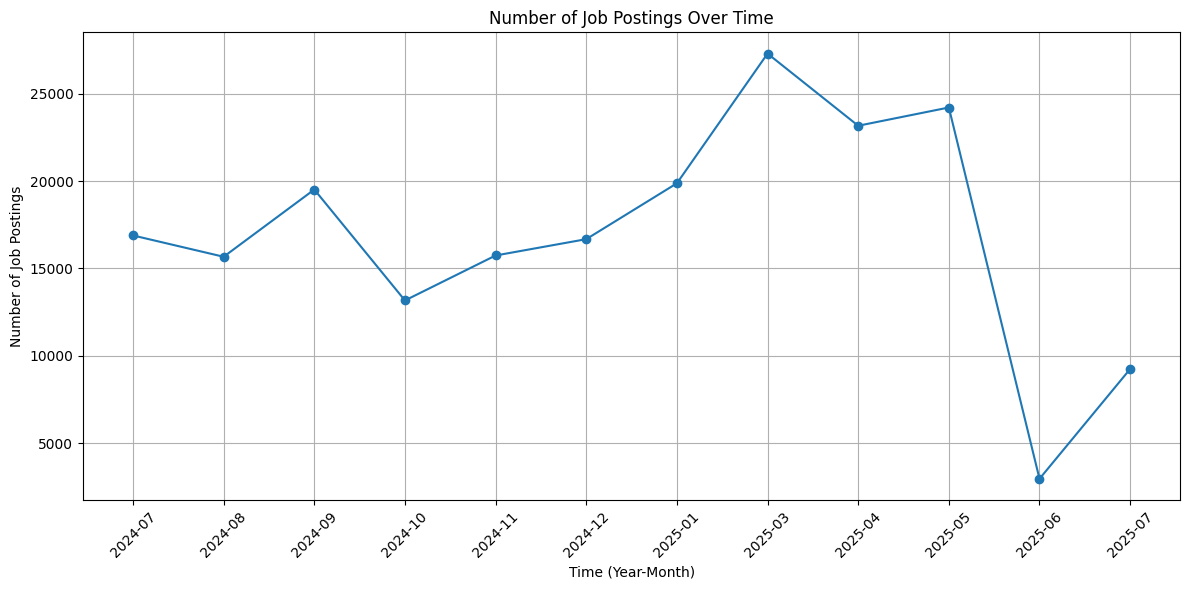

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped["Job_ID"], marker='o')
plt.title("Number of Job Postings Over Time")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Job Postings")
plt.xticks(ticks=df_grouped.index, labels=[f"{row['year']}-{row['month']:02d}" for _, row in df_grouped.iterrows()], rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [19]:
df.groupby(['year', 'month'])["Skills"].count()

year  month
2024  7        16885
      8        15666
      9        19512
      10       13166
      11       15739
      12       16673
2025  1        19869
      3        27289
      4        23161
      5        24205
      6         2963
      7         9245
Name: Skills, dtype: int64

In [20]:
df_green_skills = pd.read_csv("../data/green_skill_classification/green_skills_with_GPT-4_full_dataset.csv")

<Axes: xlabel='esco_skill_name'>

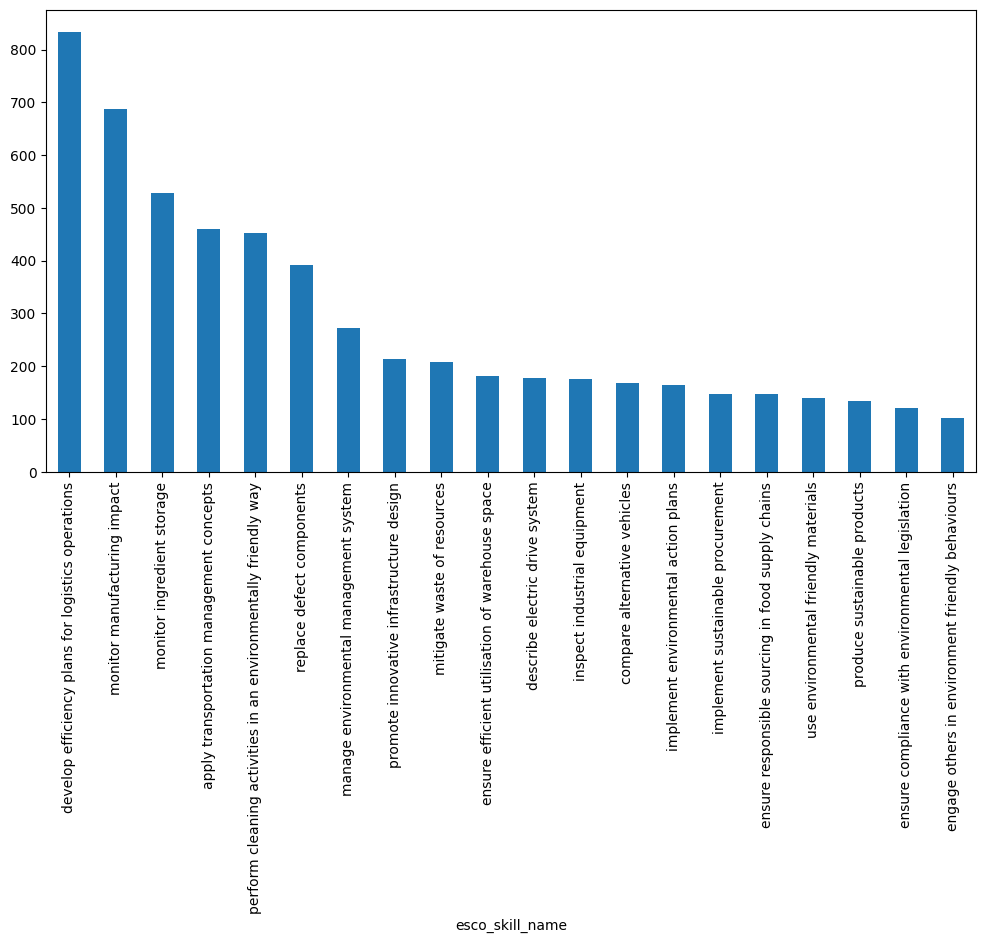

In [21]:
df_green_skills[df_green_skills["esco_skill_name"] != "No"]["esco_skill_name"].value_counts()[:20].plot(kind='bar', figsize=(12, 6))

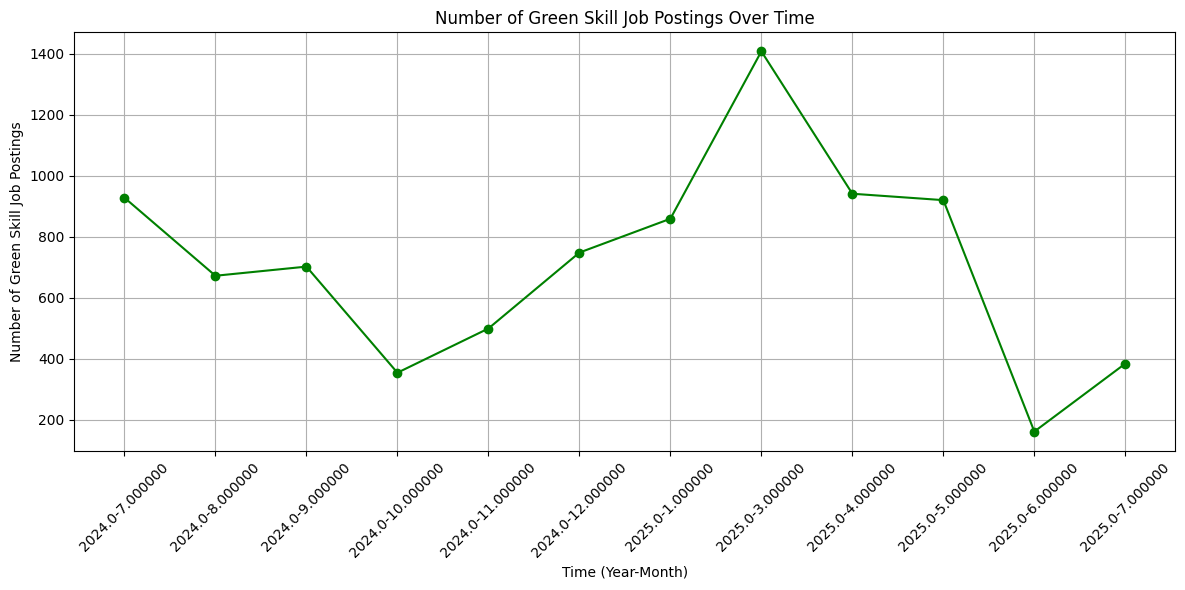

In [48]:
df_month_year = df_green_skills.copy()
df_month_year = df_month_year[df_month_year["esco_skill_name"] != "No"]

df_month_year = df_month_year.groupby(['year', 'month'])["esco_skill_name"].count().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df_month_year.index, df_month_year["esco_skill_name"], marker='o', color='green')
plt.title("Number of Green Skill Job Postings Over Time")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Green Skill Job Postings")
plt.xticks(ticks=df_month_year.index, labels=[f"{row['year']}-{row['month']:02f}" for _, row in df_month_year.iterrows()], rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [8]:
map_month_year = {
    f"{row['year']}-{row['month']:02d}": row['counts']
    for _, row in df_grouped_month_year.iterrows()
}

map_month_year

{'2024-07': np.int64(16885),
 '2024-08': np.int64(15666),
 '2024-09': np.int64(19512),
 '2024-10': np.int64(13166),
 '2024-11': np.int64(15739),
 '2024-12': np.int64(16673),
 '2025-01': np.int64(19869),
 '2025-03': np.int64(27289),
 '2025-04': np.int64(23161),
 '2025-05': np.int64(24205),
 '2025-06': np.int64(2963),
 '2025-07': np.int64(9245)}

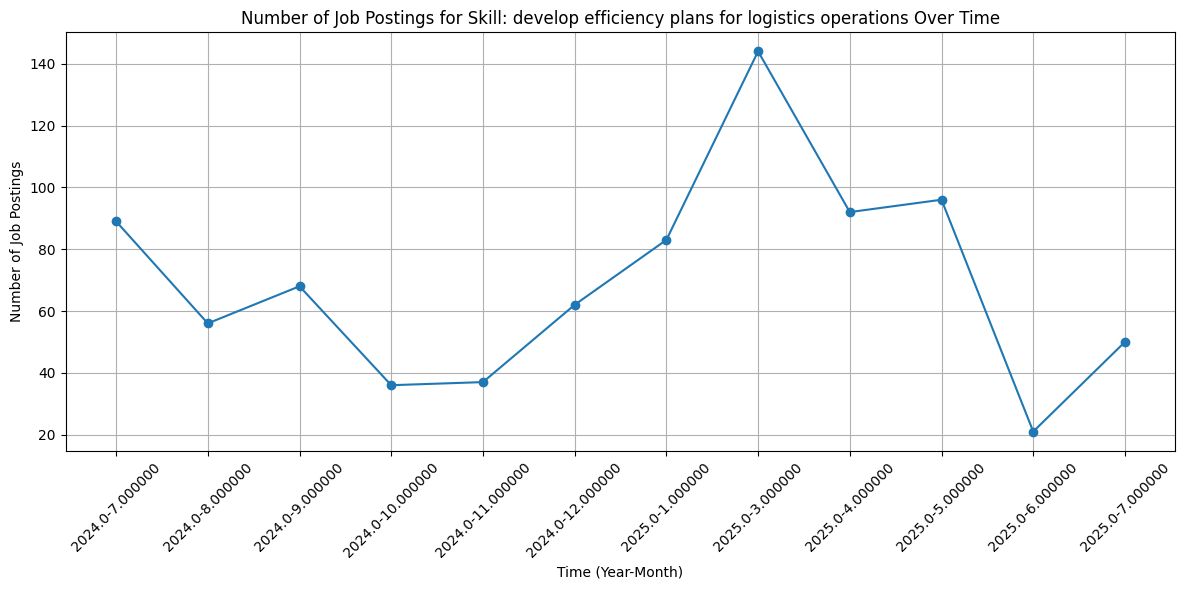

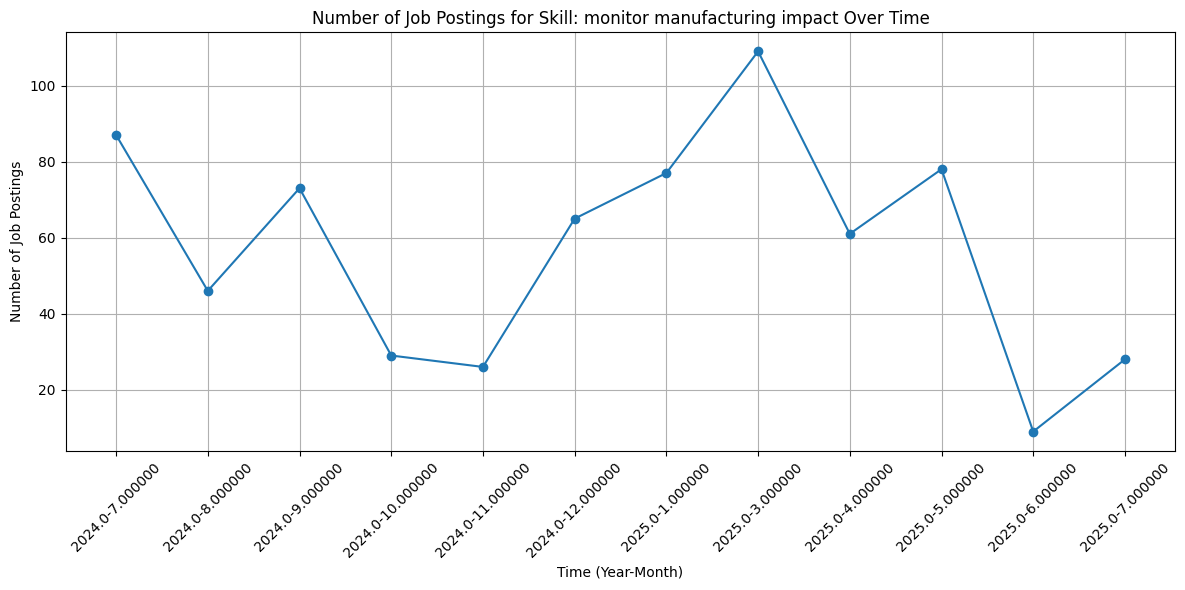

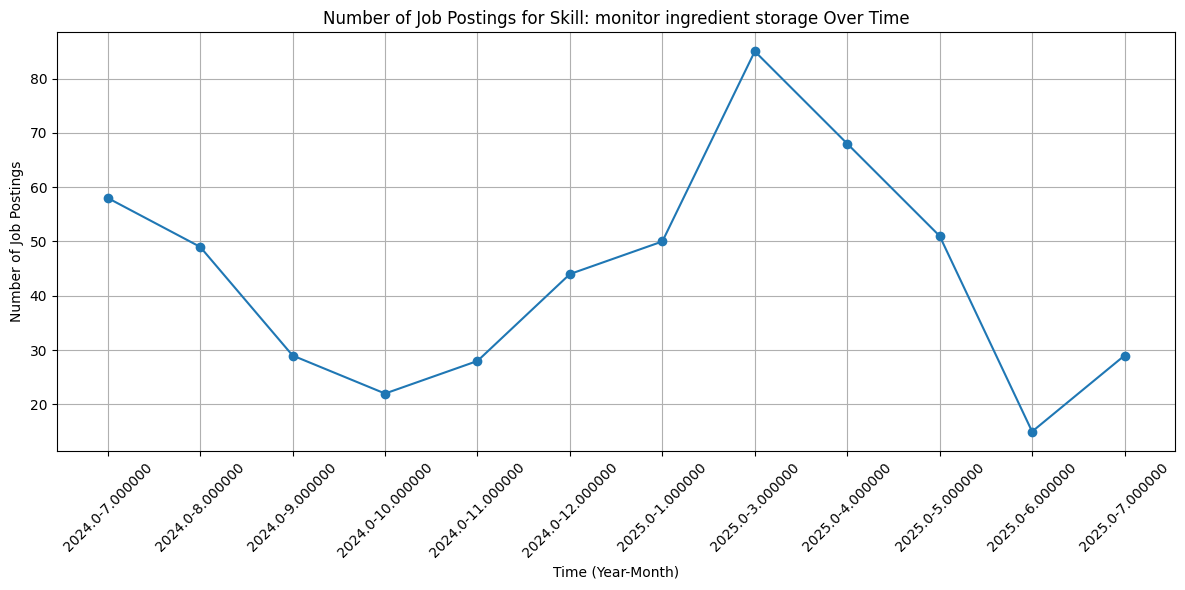

In [66]:
def draw_skill_over_time(skill_name):
    df_skill = df_green_skills.copy()
    df_skill = df_skill[df_skill["esco_skill_name"] == skill_name]
    df_skill = df_skill.groupby(['year', 'month'])["esco_skill_name"].count().reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_skill.index, df_skill["esco_skill_name"], marker='o')
    plt.title(f"Number of Job Postings for Skill: {skill_name} Over Time")
    plt.xlabel("Time (Year-Month)")
    plt.ylabel("Number of Job Postings")
    plt.xticks(ticks=df_skill.index, labels=[f"{row['year']}-{row['month']:02f}" for _, row in df_skill.iterrows()], rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

draw_skill_over_time("develop efficiency plans for logistics operations")
draw_skill_over_time("monitor manufacturing impact")
draw_skill_over_time("monitor ingredient storage")


# Create pivot table

In [69]:

df_with_months = pd.read_csv("../data/green_skill_classification/green_skills_with_GPT-4_full_dataset.csv")
df_with_months = df_with_months[df_with_months["esco_skill_name"] != "No"]
counts = df_with_months.groupby(["esco_skill_name", "month", "year"]).size().reset_index(name="count")

counts["year_month"] = counts.apply(lambda x: f"{int(x['year']):04d}-{int(x['month']):02d}", axis=1)

result = counts.pivot(index="esco_skill_name", columns="year_month", values="count").fillna(0).astype(int)
result = result.reindex(sorted(result.columns, key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1]))), axis=1)
result = result.reset_index()

print(result.head())

year_month                                    esco_skill_name  2024-07  \
0                    abide by regulations on banned materials        1   
1                         adapt energy distribution schedules        2   
2           adopt ways to foster biodiversity and animal w...        0   
3           adopt ways to reduce negative impact of consum...        0   
4                              adopt ways to reduce pollution        2   

year_month  2024-08  2024-09  2024-10  2024-11  2024-12  2025-01  2025-03  \
0                 0        3        1        2        2        1        1   
1                 1        1        1        1        1        0        0   
2                 0        0        0        1        1        0        0   
3                 2        1        0        1        5        2        7   
4                 0        0        0        1        1        0        2   

year_month  2025-04  2025-05  2025-06  2025-07  
0                 0        0        0      

In [71]:
result.to_csv("../data/green_skill_classification/green_skills_with_GPT-4_full_dataset_with_months.csv", index=False)

In [75]:
print(result.shape)

(274, 13)


In [73]:
print("Percentage of green skill job postings:", len(df_green_skills[df_green_skills["esco_skill_name"] != "No"]) / len(df_green_skills) * 100, "%")
print("Total job postings:", len(df_green_skills))
print("Total green skill job postings:", len(df_green_skills[df_green_skills["esco_skill_name"] != "No"]))

Percentage of green skill job postings: 4.375086088593453 %
Total job postings: 196019
Total green skill job postings: 8576


# Prepare data for time series model

The data should have the following structure:
| region_id (in this case only one region) | skill_id | 2024-07 | 2024-08 | 2024-09 | ... |
|-----------------------------------------|----------|---------|---------|---------|-----|
| 1                                       | skill_1  |   10    |   12    |   15    | ... |
| 1                                       | skill_2  |   5     |   7     |   9     | ... |
| ...                                     |  ...     |   ...   |   ...   |   ...   | ... |

Where each cell contains the count of job postings requiring that skill in that month for the specified region.

In [85]:
data_for_timeseries.head()

,esco_skill_name,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-03,2025-04,2025-05,2025-06,2025-07
0,abide by regulations on banned materials,1,0,3,1,2,2,1,1,0,0,0,0
1,adapt energy distribution schedules,2,1,1,1,1,1,0,0,1,1,1,0
2,adopt ways to foster biodiversity and animal w...,0,0,0,0,1,1,0,0,0,0,0,0
3,adopt ways to reduce negative impact of consum...,0,2,1,0,1,5,2,7,6,5,0,1
4,adopt ways to reduce pollution,2,0,0,0,1,1,0,2,0,2,0,1


In [3]:
data_for_timeseries = pd.read_csv("../data/green_skill_classification/green_skills_with_GPT-4_full_dataset_with_months.csv")

map_skills = {idx + 1: skill for idx, skill in enumerate(data_for_timeseries["esco_skill_name"].unique())}

with open("../data/green_skill_classification/mapping/map_skills.json", "w") as f:
    json.dump(map_skills, f, indent=4)

data_for_timeseries["esco_skill_name"] = data_for_timeseries["esco_skill_name"].map(map_skills)

In [88]:
data_for_timeseries.insert(0, 'region_id', 1)

In [89]:
data_for_timeseries.head()

,region_id,esco_skill_name,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-03,2025-04,2025-05,2025-06,2025-07
0,1,1,1,0,3,1,2,2,1,1,0,0,0,0
1,1,2,2,1,1,1,1,1,0,0,1,1,1,0
2,1,3,0,0,0,0,1,1,0,0,0,0,0,0
3,1,4,0,2,1,0,1,5,2,7,6,5,0,1
4,1,5,2,0,0,0,1,1,0,2,0,2,0,1


In [91]:
data_for_timeseries.to_csv("../data/green_skill_classification/data_for_timeseries.csv", index=False)

## Normalize data

In [23]:
data_for_timeseries = pd.read_csv("../data/green_skill_classification/data_for_timeseries.csv")
data_for_timeseries.head()

,region_id,skill_id,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-03,2025-04,2025-05,2025-06,2025-07
0,1,1,1,0,3,1,2,2,1,1,0,0,0,0
1,1,2,2,1,1,1,1,1,0,0,1,1,1,0
2,1,3,0,0,0,0,1,1,0,0,0,0,0,0
3,1,4,0,2,1,0,1,5,2,7,6,5,0,1
4,1,5,2,0,0,0,1,1,0,2,0,2,0,1


In [20]:
map_month_year

{'2024-07': np.int64(16885),
 '2024-08': np.int64(15666),
 '2024-09': np.int64(19512),
 '2024-10': np.int64(13166),
 '2024-11': np.int64(15739),
 '2024-12': np.int64(16673),
 '2025-01': np.int64(19869),
 '2025-03': np.int64(27289),
 '2025-04': np.int64(23161),
 '2025-05': np.int64(24205),
 '2025-06': np.int64(2963),
 '2025-07': np.int64(9245)}

In [24]:
for column in data_for_timeseries.columns:
    if column in map_month_year.keys():
        data_for_timeseries[column] = data_for_timeseries[column] / map_month_year[column]
data_for_timeseries.head()

,region_id,skill_id,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-03,2025-04,2025-05,2025-06,2025-07
0,1,1,0.000059,0.000000,0.000154,0.000076,0.000127,0.00012,0.000050,0.000037,0.000000,0.000000,0.000000,0.000000
1,1,2,0.000118,0.000064,0.000051,0.000076,0.000064,0.00006,0.000000,0.000000,0.000043,0.000041,0.000337,0.000000
2,1,3,0.000000,0.000000,0.000000,0.000000,0.000064,0.00006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,4,0.000000,0.000128,0.000051,0.000000,0.000064,0.00030,0.000101,0.000257,0.000259,0.000207,0.000000,0.000108
4,1,5,0.000118,0.000000,0.000000,0.000000,0.000064,0.00006,0.000000,0.000073,0.000000,0.000083,0.000000,0.000108


In [25]:
data_for_timeseries.to_csv("../data/green_skill_classification/data_for_timeseries_normalized.csv", index=False)